In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

In [2]:
df = pd.read_excel('Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Explore data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


Check null value

In [5]:
columns_with_na = df.columns[df.isna().any()]
columns_with_na

Index(['Description', 'CustomerID'], dtype='object')

there are 2 columns that contains na value: Descriptions and CustomerID

In [6]:
def d_null(df):
    d_null=df.isnull().sum()
    return d_null[d_null>0]
d_null(df)    

Description      1454
CustomerID     135080
dtype: int64

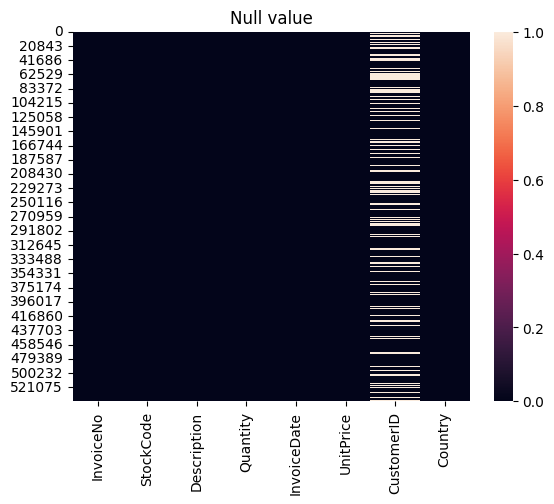

In [7]:
sns.heatmap(df.isnull())
plt.title('Null value')

plt.show()

# Data Cleaning

Fill the null value in CustomerID column by propagating the last valid observation to next valid. Because if we see the pattern, the CustomerID are always sequential and when there is a null value, the next valid value always follows the valid value before the null value.

In [8]:
df['CustomerID'].ffill(inplace=True)

C:\Users\faruq\AppData\Local\Temp\ipykernel_3084\1298321567.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CustomerID'].ffill(inplace=True)


In [9]:
df['CustomerID'].isna().sum()

np.int64(0)

Drop the row in Descriptions column that contain null value, and also value written in lowercase or containt lowercasae letter, because if we see, all the valid description item everything are on uppercase. While the desc with lowercase always give absurd description and dont represents the item.

In [10]:
df = df.dropna(subset=['Description'])

In [11]:
df['Description'] = df['Description'].astype(str)

In [12]:
df = df[~df['Description'].str.islower()]

In [13]:
df = df[~df['Description'].str.contains(r'[a-z]')]

Drop row in Quantity column where the value is less than 1, because it doesnt make sense if we buy some thing with 0 quantity

In [14]:
df = df[df['Quantity'] >= 1]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 528461 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    528461 non-null  object        
 1   StockCode    528461 non-null  object        
 2   Description  528461 non-null  object        
 3   Quantity     528461 non-null  int64         
 4   InvoiceDate  528461 non-null  datetime64[ns]
 5   UnitPrice    528461 non-null  float64       
 6   CustomerID   528461 non-null  float64       
 7   Country      528461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.3+ MB


Drop row where in UnitPrice columns has 0 value

In [17]:
df = df[df['UnitPrice'] > 0]

Drop row where in Description column has 'postage'

In [18]:
df = df[~df['Description'].str.contains('POSTAGE', case=False, na=False)]

# EDA

Make new column named TotalPrice

In [19]:
df['TotalPrice'] = (df['Quantity'] * df['UnitPrice'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 526219 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    526219 non-null  object        
 1   StockCode    526219 non-null  object        
 2   Description  526219 non-null  object        
 3   Quantity     526219 non-null  int64         
 4   InvoiceDate  526219 non-null  datetime64[ns]
 5   UnitPrice    526219 non-null  float64       
 6   CustomerID   526219 non-null  float64       
 7   Country      526219 non-null  object        
 8   TotalPrice   526219 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 40.1+ MB


Make YearMonth column to make line chart for revenue per year

In [20]:
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M').astype(str)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,YearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011-12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011-12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12


Find revenue trend per month

In [21]:
rev_per_year = df.groupby(df.YearMonth)['TotalPrice'].sum().reset_index()

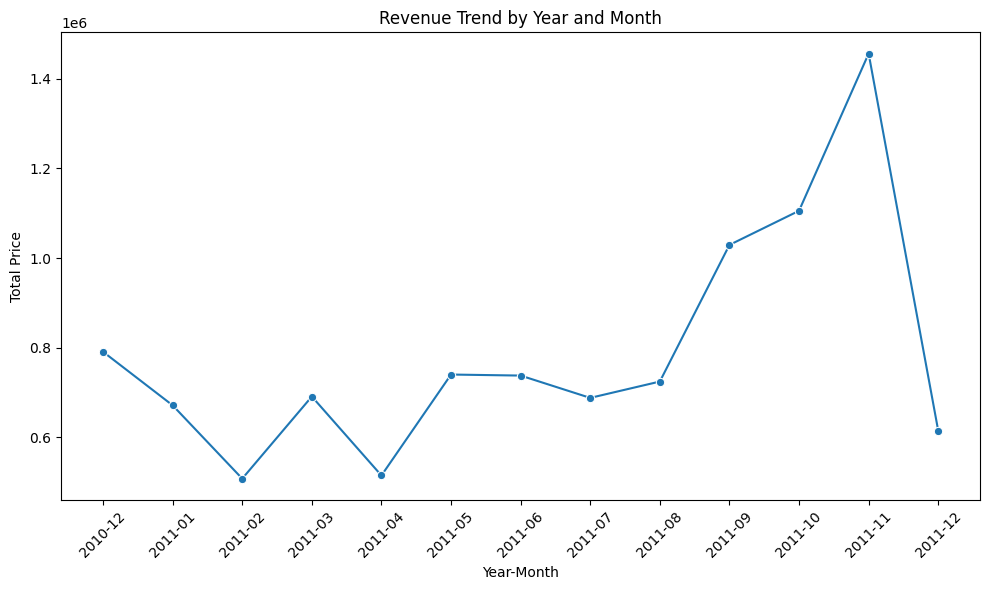

In [22]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=rev_per_year, x='YearMonth', y='TotalPrice', marker='o')

# Set plot labels and title
plt.xticks(rotation=45)
plt.xlabel('Year-Month')
plt.ylabel('Total Price')
plt.title('Revenue Trend by Year and Month')

# Show plot
plt.tight_layout()
plt.show()

Find top 10 revenue by description or category 

In [23]:
rev_per_desc = df.groupby('Description', as_index=False)['TotalPrice'].sum().sort_values(by='TotalPrice', ascending=False)

In [24]:
top_rev_desc = rev_per_desc.head(10)
x = top_rev_desc['Description']
y = top_rev_desc['TotalPrice']

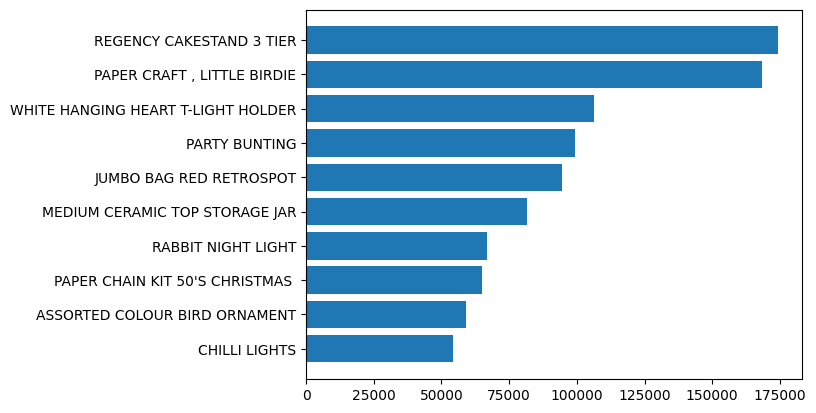

In [25]:
plt.barh(x[::-1],y[::-1])
plt.show()

Top 10 revenue by country

In [26]:
rev_per_country = df.groupby('Country', as_index=False)['TotalPrice'].sum().sort_values(by='TotalPrice', ascending=False)
rev_per_country.head(10)

,Country,TotalPrice
36,United Kingdom,8744611.103
24,Netherlands,283889.340
10,EIRE,276011.000
14,Germany,205451.570
13,France,184566.550
0,Australia,138171.310
31,Spain,55658.030
33,Switzerland,53059.380
20,Japan,37416.370
3,Belgium,36837.600


# 1. Cohort analysis

In [27]:
buyer_2011 = df[df['InvoiceDate'].dt.year == 2011]
buyer_2011['YearMonth'] = buyer_2011['InvoiceDate'].dt.to_period('M')

C:\Users\faruq\AppData\Local\Temp\ipykernel_3084\3875274934.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buyer_2011['YearMonth'] = buyer_2011['InvoiceDate'].dt.to_period('M')


In [28]:
buyer_monthly = buyer_2011.groupby(['CustomerID','YearMonth'], as_index=False).agg(
    order_cnt=('InvoiceNo','nunique')
)

In [29]:
buyer_monthly

,CustomerID,YearMonth,order_cnt
0,12346.0,2011-01,1
1,12347.0,2011-01,1
2,12347.0,2011-04,1
3,12347.0,2011-06,1
4,12347.0,2011-08,1
...,...,...,...
12156,18283.0,2011-10,1
12157,18283.0,2011-11,4
12158,18283.0,2011-12,1
12159,18287.0,2011-05,1


In [30]:
buyer_monthly['Cohort'] = buyer_monthly.groupby('CustomerID')['YearMonth'].transform('min')
buyer_monthly

,CustomerID,YearMonth,order_cnt,Cohort
0,12346.0,2011-01,1,2011-01
1,12347.0,2011-01,1,2011-01
2,12347.0,2011-04,1,2011-01
3,12347.0,2011-06,1,2011-01
4,12347.0,2011-08,1,2011-01
...,...,...,...,...
12156,18283.0,2011-10,1,2011-01
12157,18283.0,2011-11,4,2011-01
12158,18283.0,2011-12,1,2011-01
12159,18287.0,2011-05,1,2011-05


In [31]:
from operator import attrgetter

buyer_monthly['PeriodNum'] = (buyer_monthly['YearMonth'] - buyer_monthly['Cohort']).apply(attrgetter('n')) + 1

In [32]:
cohort_pivot = pd.pivot_table(buyer_monthly, index='Cohort', columns='PeriodNum', values='CustomerID', aggfunc=pd.Series.nunique)
cohort_pivot

PeriodNum,1,2,3,4,5,6,7,8,9,10,11,12
Cohort,,,,,,,,,,,,
2011-01,741.0,263.0,320.0,285.0,336.0,312.0,290.0,284.0,323.0,309.0,382.0,191.0
2011-02,496.0,117.0,122.0,170.0,154.0,134.0,152.0,162.0,153.0,181.0,62.0,NaN
2011-03,538.0,91.0,144.0,121.0,123.0,100.0,153.0,129.0,162.0,57.0,NaN,NaN
2011-04,361.0,84.0,79.0,85.0,76.0,86.0,88.0,107.0,31.0,NaN,NaN,NaN
2011-05,319.0,59.0,56.0,58.0,70.0,77.0,88.0,31.0,NaN,NaN,NaN,NaN
2011-06,268.0,49.0,41.0,68.0,60.0,89.0,26.0,NaN,NaN,NaN,NaN,NaN
2011-07,211.0,38.0,45.0,49.0,57.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,185.0,38.0,46.0,46.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-09,315.0,77.0,99.0,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
cohort_size = cohort_pivot.iloc[:, 0]

cohort_size

Cohort
2011-01    741.0
2011-02    496.0
2011-03    538.0
2011-04    361.0
2011-05    319.0
2011-06    268.0
2011-07    211.0
2011-08    185.0
2011-09    315.0
2011-10    374.0
2011-11    361.0
2011-12     46.0
Freq: M, Name: 1, dtype: float64

In [34]:
retention_cohort = cohort_pivot.divide(cohort_size, axis=0)
retention_cohort

PeriodNum,1,2,3,4,5,6,7,8,9,10,11,12
Cohort,,,,,,,,,,,,
2011-01,1.0,0.354926,0.431849,0.384615,0.453441,0.421053,0.391363,0.383266,0.435897,0.417004,0.51552,0.25776
2011-02,1.0,0.235887,0.245968,0.342742,0.310484,0.270161,0.306452,0.326613,0.308468,0.364919,0.12500,NaN
2011-03,1.0,0.169145,0.267658,0.224907,0.228625,0.185874,0.284387,0.239777,0.301115,0.105948,NaN,NaN
2011-04,1.0,0.232687,0.218837,0.235457,0.210526,0.238227,0.243767,0.296399,0.085873,NaN,NaN,NaN
2011-05,1.0,0.184953,0.175549,0.181818,0.219436,0.241379,0.275862,0.097179,NaN,NaN,NaN,NaN
2011-06,1.0,0.182836,0.152985,0.253731,0.223881,0.332090,0.097015,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.180095,0.213270,0.232227,0.270142,0.132701,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.205405,0.248649,0.248649,0.135135,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-09,1.0,0.244444,0.314286,0.120635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


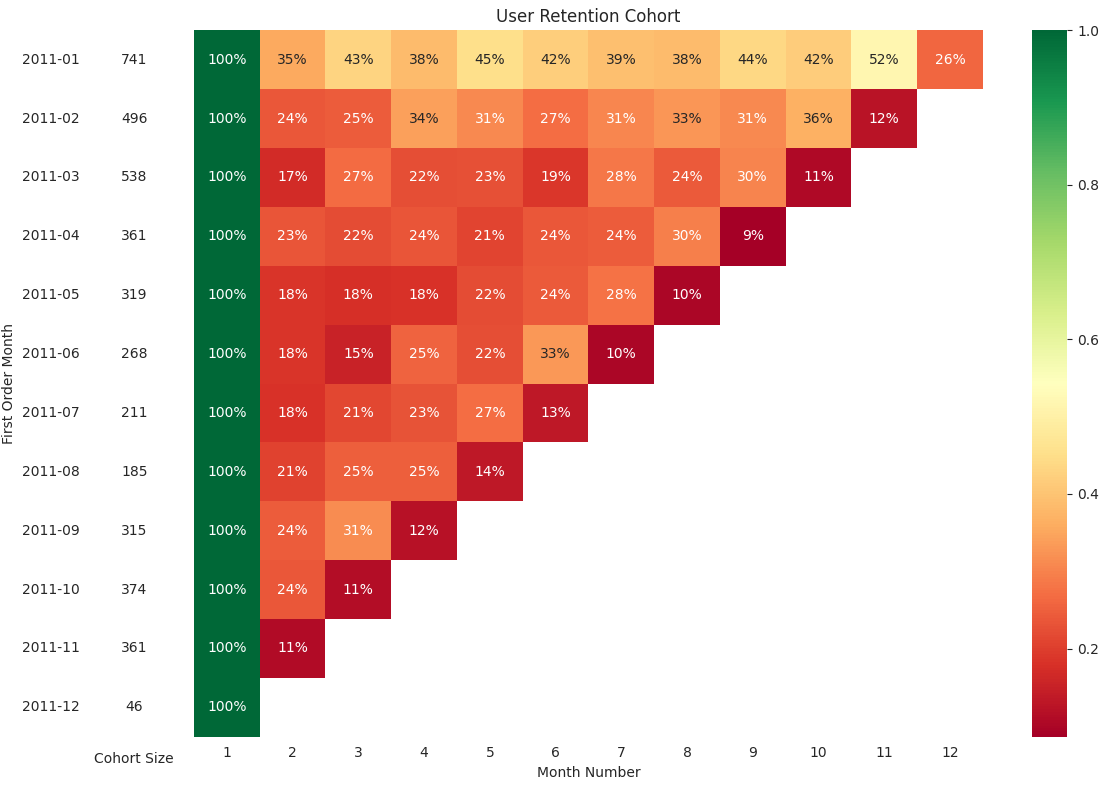

In [35]:
import matplotlib.colors as mcolors

with sns.axes_style('white'):

    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios':[1, 11]})

    # user retention cohort
    sns.heatmap(retention_cohort, annot=True, fmt='.0%', cmap='RdYlGn', ax=ax[1])
    ax[1].set_title('User Retention Cohort')
    ax[1].set(xlabel='Month Number', ylabel='')

    # cohort size
    df_cohort_size = pd.DataFrame(cohort_size)
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(df_cohort_size, annot=True, cbar=False, fmt='g', cmap=white_cmap, ax=ax[0])
    ax[0].tick_params(bottom=False)
    ax[0].set(xlabel='Cohort Size', ylabel='First Order Month', xticklabels=[])
    ax[0].set_yticklabels(ax[0].get_yticklabels(), rotation=0)

    fig.tight_layout()

# 2. Market Basket Analysis

In [48]:
mba = df

In [49]:
basket = pd.pivot_table(mba, index='InvoiceNo', columns='Description', values='StockCode', aggfunc='nunique', fill_value=0)

In [50]:
basket.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19752 entries, 536365 to 581587
Columns: 3992 entries,  4 PURPLE FLOCK DINNER CANDLES to ZINC WIRE SWEETHEART LETTER TRAY
dtypes: int64(3992)
memory usage: 601.7 MB


In [51]:
def encode(x):
    if x==0:
        return False
    if x>0:
        return True

basket_encode = basket.applymap(encode)

C:\Users\faruq\AppData\Local\Temp\ipykernel_3084\3850650692.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_encode = basket.applymap(encode)


In [52]:
basket_filter = basket_encode[(basket_encode>0).sum(axis=1)>1]

In [57]:
from mlxtend.frequent_patterns import apriori


frequent_itemset = apriori(basket_filter, min_support=.03,use_colnames=True).sort_values('support', ascending=False).reset_index(drop=True)
frequent_itemset['product_cnt'] = frequent_itemset['itemsets'].apply(lambda x: len(x))
frequent_itemset

,support,itemsets,product_cnt
0,0.122542,(WHITE HANGING HEART T-LIGHT HOLDER),1
1,0.113558,(JUMBO BAG RED RETROSPOT),1
2,0.107642,(REGENCY CAKESTAND 3 TIER),1
3,0.091482,(PARTY BUNTING),1
4,0.085620,(LUNCH BAG RED RETROSPOT),1
...,...,...,...
159,0.030348,"(LUNCH BAG CARS BLUE, LUNCH BAG RED RETROSPOT)",2
160,0.030293,(HAND WARMER BIRD DESIGN),1
161,0.030238,"(PAPER CHAIN KIT VINTAGE CHRISTMAS, PAPER CHAI...",2
162,0.030129,(CHILDRENS APRON SPACEBOY DESIGN),1


In [58]:
from mlxtend.frequent_patterns import association_rules

product_association = association_rules(frequent_itemset, num_itemsets=frequent_itemset, metric='confidence', min_threshold=.7).sort_values(['support','confidence'], ascending=[False,False]).reset_index(drop=True)
product_association.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.055492,0.058176,0.042016,0.757157,13.014972,1.0,0.038788,3.878325,0.977403,0.586391,0.742157,0.739690
1,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.058176,0.055492,0.042016,0.722222,13.014972,1.0,0.038788,3.400230,0.980189,0.586391,0.705902,0.739690
2,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.041632,0.055492,0.034621,0.831579,14.985660,1.0,0.032310,5.608018,0.973812,0.553900,0.821684,0.727734
3,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.041632,0.058176,0.032758,0.786842,13.525238,1.0,0.030336,4.418434,0.966293,0.488562,0.773675,0.674965
